In [2]:
import numpy as np
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import community #python-louvain package
import nxviz # graph visualization of nx
#requirement: download pycairo from unofficial binaries and installed for igraph.plot() support

This code helps to keep plot objects of `igraph` on Jupyter Notebook intead of separate views:

In [8]:
import os
from IPython.display import display, Image
def my_display(figure):
    file = figure.save('temporary.png')
    display(Image(filename='temporary.png'))
    os.remove('temporary.png')

### Networkx

A. Plot a circular graph that is matched by edges (0,1), (1,2), (2,3), (3,4), (4,5).  Use `nx.draw_networkx()` to plot it. Requirements should be satisfied:
* Edges has `color` and `weight` attributes assigned
* Draw attributes `color` and `weight` are extracted from attribute storage area of the graph
* Draw uses labels for vertices, lightgreen color and frame width = 3
* Draw uses circular layout
* **Plot is minimized using `figsize`**
* **Vertices are added one by one while creating a graph**

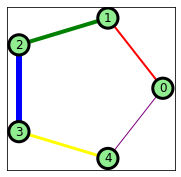

In [3]:
#https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
plt.figure(figsize = (3,3))
G = nx.Graph()
G.add_edge(0,1,color='red',weight=2)
G.add_edge(1,2,color='green',weight=4)
G.add_edge(2,3,color='blue',weight=6)
G.add_edge(3,4,color='yellow',weight=3)
G.add_edge(4,0,color='purple',weight=1)

pos = nx.circular_layout(G) #default is nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True,
        edge_color=nx.get_edge_attributes(G,'color').values(), #dict_values of dict
        width=list(nx.get_edge_attributes(G,'weight').values()), #listed values of dict 
        bbox = dict(fc="lightgreen", ec="black", boxstyle="circle", lw=3),
        node_color='lightgreen') #this gets unnecesary if bbox[fc] is given
plt.show()

B. Same task, edges should be added every at once and then 'blue' color replaced by 'orange'

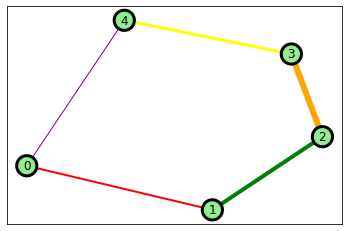

In [10]:
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)])#, color = ['red', 'green', 'blue','yellow','purple'])
nx.set_edge_attributes(G, {(0,1):'red', (1, 2):'green', (2, 3):'blue', (3, 4): 'yellow', (4, 0): 'purple'}, 'color')
nx.set_edge_attributes(G, {(0,1):2, (1, 2):4, (2, 3):6, (3, 4):3, (4, 0):1}, 'weight')

# Alternative way using pandas
# import pandas as pd
# edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]
# G = nx.Graph()
# G.add_edges_from(edges)
# df = pd.DataFrame(np.array([['red', 'green', 'blue','yellow','purple'], [2,4,6,3,1]]).T, 
#                   columns=['color','weight'], index = edges)

# nx.set_edge_attributes(G, df['color'].to_dict(), 'color')
# nx.set_edge_attributes(G, df['weight'].to_dict(), 'weight')

G[2][3]['color'] = 'orange'

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True,
        edge_color=nx.get_edge_attributes(G,'color').values(), #dict_values of dict
        width=list(nx.get_edge_attributes(G,'weight').values()), #listed values of dict 
        bbox = dict(fc="lightgreen", ec="black", boxstyle="circle", lw=3),
        node_color='lightgreen') #this gets unnecesary if bbox[fc] is given
plt.show()

C. Give an example how to acces edge attributes of previous `G` in three ways:
* list of tuples `(<v1>, <v2>, <dict of all attributes>)`
* list of tuples `(<v1>, <v2>, <specific attribute value>)`
* dictionary of edges `(<v1>, <v2>)` -> `<specific attribute value>`

In [11]:
print(G.edges)
print(G.edges.data())
print(G.edges(data=True)) # same
print(G.edges.data('weight'))
print(nx.get_edge_attributes(G, 'weight'))

[(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]
[(0, 1, {'color': 'red', 'weight': 2}), (0, 4, {'color': 'purple', 'weight': 1}), (1, 2, {'color': 'green', 'weight': 4}), (2, 3, {'color': 'orange', 'weight': 6}), (3, 4, {'color': 'yellow', 'weight': 3})]
[(0, 1, {'color': 'red', 'weight': 2}), (0, 4, {'color': 'purple', 'weight': 1}), (1, 2, {'color': 'green', 'weight': 4}), (2, 3, {'color': 'orange', 'weight': 6}), (3, 4, {'color': 'yellow', 'weight': 3})]
[(0, 1, 2), (0, 4, 1), (1, 2, 4), (2, 3, 6), (3, 4, 3)]
{(0, 1): 2, (0, 4): 1, (1, 2): 4, (2, 3): 6, (3, 4): 3}


D. Given edges, create a graph and return a sorted list of nodes and corresponding list of tags of connected components. [Source](stackoverflow.com/questions/63623869/)

In [6]:
def tagging(G):
    #what are tags for each item in nodes?
    idx_components = {u:i for i,node_set in enumerate(nx.connected_components(G)) for u in node_set}
    tags = [idx_components[u] for u in G.nodes()]
    return tags

def tagging_simplified(sequence, labeller):
    idx = {u:i for i, label in enumerate(labeller) for u in label}
    tags = [idx[u] for u in sequence]
    return tags
    
def test_functions(edges):
    G = nx.Graph()
    G.add_edges_from(edges)
    sequence, labeller = list(G.nodes), list(map(list, nx.connected_components(G)))
    print(f'args: sequence={sequence}; labeller={labeller}')
    print(list(G.nodes),'->', tagging(G))
    print(list(G.nodes),'->', tagging_simplified(sequence, labeller))

test_functions([(1, 2), (2, 4), (3, 5), (9,7), (7,8), (7,6)])
test_functions([(1, 2), (2, 4), (3, 5)])
test_functions([(1, 2), (1, 10), (2, 10), (5, 6), (4, 5), (4, 3), (4, 7), (8, 9)])

args: sequence=[1, 2, 4, 3, 5, 9, 7, 8, 6]; labeller=[[1, 2, 4], [3, 5], [8, 9, 6, 7]]
[1, 2, 4, 3, 5, 9, 7, 8, 6] -> [0, 0, 0, 1, 1, 2, 2, 2, 2]
[1, 2, 4, 3, 5, 9, 7, 8, 6] -> [0, 0, 0, 1, 1, 2, 2, 2, 2]
args: sequence=[1, 2, 4, 3, 5]; labeller=[[1, 2, 4], [3, 5]]
[1, 2, 4, 3, 5] -> [0, 0, 0, 1, 1]
[1, 2, 4, 3, 5] -> [0, 0, 0, 1, 1]
args: sequence=[1, 2, 10, 5, 6, 4, 3, 7, 8, 9]; labeller=[[1, 2, 10], [3, 4, 5, 6, 7], [8, 9]]
[1, 2, 10, 5, 6, 4, 3, 7, 8, 9] -> [0, 0, 0, 1, 1, 1, 1, 1, 2, 2]
[1, 2, 10, 5, 6, 4, 3, 7, 8, 9] -> [0, 0, 0, 1, 1, 1, 1, 1, 2, 2]


E. Plot a diagram with 3 * 3 plot of custom layered connections and **axis turned on.** [Source](https://stackoverflow.com/a/63541519/3044825)

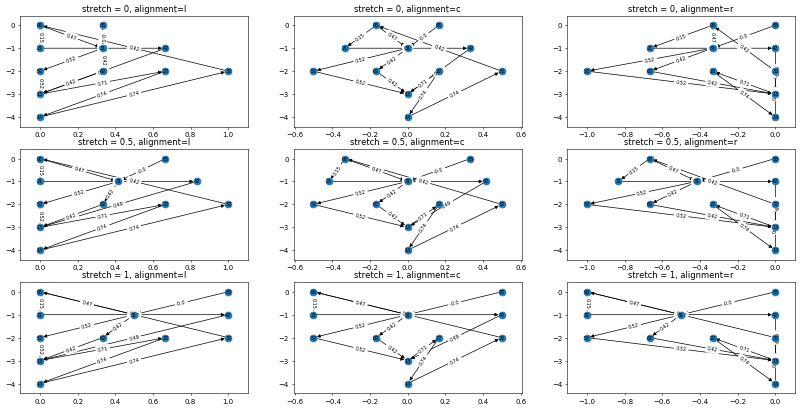

In [159]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def layered_layout(layers, stretch=0, alignment='c'):
    sizes = np.array([len(n) for n in layers])
    lfill = [np.linspace(0, 1, n) for n in sizes]
    scales = (sizes - 1)/(max(sizes) - 1)
    if alignment == 'l':
        x_coord_levels = [(x - x[0]) * (s + (1 - s) * stretch) for x, s in zip(lfill, scales)]
    elif alignment == 'r':
        x_coord_levels = [(x - x[-1]) * (s + (1 - s) * stretch) for x, s in zip(lfill, scales)]
    elif alignment == 'c':
        x_coord_levels = [(x - (x[0]+x[-1])/2) * (s + (1 - s) * stretch) for x, s in zip(lfill, scales)]
    else:
        raise AttributeError('invalid alignment attribute')
    y_coord_levels = [np.repeat(-y, times) for y, times in zip(np.arange(len(sizes)), sizes)]
    pos_levels = [dict(zip(l, zip(*p))) for l,p in zip(layers, zip(x_coord_levels, y_coord_levels))]
    pos = {k: v for d in pos_levels for k, v in d.items()}
    return pos

G = nx.DiGraph()
G.add_edges_from([(21, 42), (52, 13), (42, 13), (95, 21), (31, 52), (31, 62), (95, 31), (62, 13), (32, 95), (13, 22), (85, 31), (22, 14), (14, 32)])
nx.set_edge_attributes(G, {(21, 42): 0.20, (52, 13): 0.52, (42, 13): 0.49, (95, 21): 0.15, (31, 52): 0.52, (31, 62): 0.42, (95, 31): 0.47, (62, 13): 0.42, (32, 95): 0.42, (13, 22): 0.71, (85, 31): -0.00, (22, 14): 0.74, (14, 32): 0.74}, 'w')

layers = [[95, 85], [21, 31, 42], [52, 62, 22, 32], [13], [14]]

fig = plt.figure(figsize=(20,10))
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, 1+3*j+i)
        ax.set_title(f'stretch = {[0, 0.5, 1][j]}, alignment={"lcr"[i]}')
        pos = layered_layout(layers, stretch = [0, 0.5, 1][j], alignment='lcr'[i])
        nx.draw_networkx(G, pos, with_labels=True, font_size=7, node_size=100)
        nx.draw_networkx_edge_labels(G, pos, edge_labels = nx.get_edge_attributes(G,'w'), font_size=7)
        plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis turn on
plt.show()

F. Plot graph with different colors for each component. [Check out my SO question](stackoverflow.com/questions/63623869/) for a better approach to tag connected components.

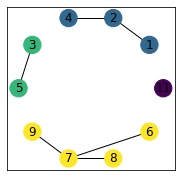

In [9]:
def tagging(components, nodes):
    idx_components = {u:i for i,node_set in enumerate(components) for u in node_set}
    tags = [idx_components[u] for u in nodes]
    return tags

plt.figure(figsize=(3,3))
G = nx.Graph()
G.add_node(11)
G.add_edges_from([(1, 2), (2, 4), (3, 5), (9,7), (7,8), (7,6)])

cc, n = list(nx.connected_components(G)), G.nodes()
tags = tagging(cc,n)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, cmap = plt.get_cmap('viridis'), node_color = tags)
plt.show()

G. Create your custom huge graph automatically and color its communities in different colors. Source: [networkx documentation](https://networkx.github.io/documentation/stable/reference/algorithms/community.html) + [`python-louvain` introduction](https://stackoverflow.com/a/40953746/3044825)

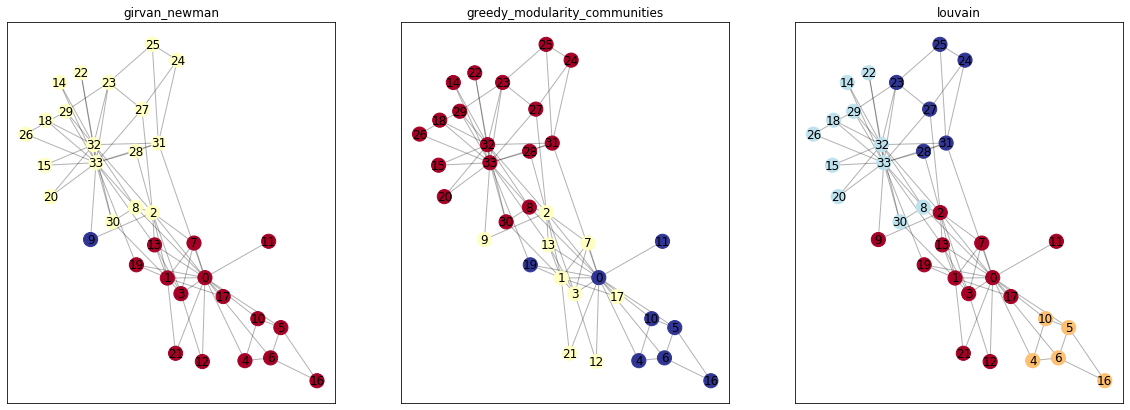

In [12]:
def tag_communities1(G):
    #returns list of tags of communities for any G
    communities_generator = nx.algorithms.community.girvan_newman(G) #one split per cycle
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    communities = list(map(list, next_level_communities))
    return tagging(communities, G.nodes())

def tag_communities2(G):
    communities = [list(n) for n in nx.algorithms.community.greedy_modularity_communities(G)]
    return tagging(communities, G.nodes())
    
def tag_communities3(G):
    partition = community.best_partition(G)
    return list(partition.values())
        
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
algorithms = [tag_communities1, tag_communities2, tag_communities3]

fig = plt.figure(figsize=(20,7))
for i in range(3):
    ax = fig.add_subplot(1, 3, 1+i)
    ax.set_title(['girvan_newman', 'greedy_modularity_communities', 'louvain'][i])
    nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=algorithms[i](G))
    nx.draw_networkx_labels(G, pos, labels=dict(zip(G.nodes, G.nodes)))
    nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show()

H. Illustrate adjacency matrix of graph. Source: [nxviz docs](https://nxviz.readthedocs.io/en/latest/usage.html) + [SO question: about removal of gaps in matplotlib](https://stackoverflow.com/questions/20057260/) + [bugfix of nxviz](https://stackoverflow.com/questions/44734622).

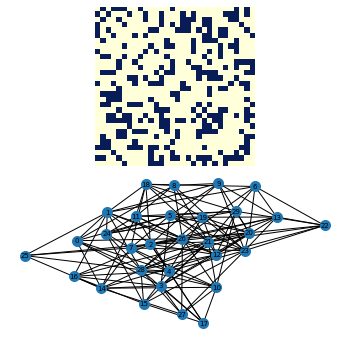

In [13]:
G = nx.erdos_renyi_graph(30, 0.3)
m = nxviz.plots.MatrixPlot(G)

m.draw()
gs = matplotlib.gridspec.GridSpec(2,1)
gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
plt.gca().set_position(gs[0].get_position(plt.gcf()))
plt.gca().set_subplotspec(gs[0])
plt.subplot(gs[1])
nx.draw(G, with_labels=True, font_size=7, node_size=100)
plt.show()
#print(nx.adjacency_matrix(G).todense()) #convert sparse matrix to array if you need it

I. Create a graph from adjacency matrix.

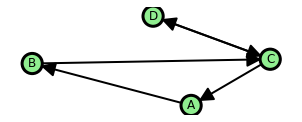

In [14]:
A = [[False, True,  False, False], [False, False, True,  False], [True,  False, False, True ], [False, False, True,  False]]
G = nx.from_numpy_matrix(np.array(A), create_using=nx.DiGraph)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D"}) #use get/set_node_attributes in a standard case
plt.figure(figsize=(4, 1.5))
nx.draw(G, with_labels=True,
        bbox = dict(fc="lightgreen", ec="black", boxstyle="circle", lw=3),
        width=2, arrowsize=30, #connectionstyle='arc3,rad=0.2' is for all the edges only
        node_color='lightgreen') #this gets unnecesary if bbox[fc] is given

J. Extract edges with specified target value (recolors edges)

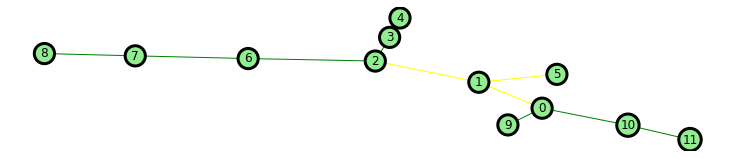

In [15]:
plt.figure(figsize=(10,2))
G = nx.Graph([(1,0), (2,1), (3,2), (4,3), (5,1), (6,2), (7,6), (8,7), (9,0), (10,0), (11,10)])
yellow_edges = dict.fromkeys(G.edges(1), 'yellow') #dict of green edges
green_edges = dict.fromkeys(G.edges, 'green')
nx.set_edge_attributes(G, green_edges, 'color')
nx.set_edge_attributes(G, yellow_edges, 'color')
nx.draw(G, with_labels=True, bbox = dict(fc="lightgreen", ec="black", boxstyle="circle", lw=3),
       edge_color=nx.get_edge_attributes(G,'color').values())

K. Extract layout of previous graph in order to reuse it for plot of its spanning tree

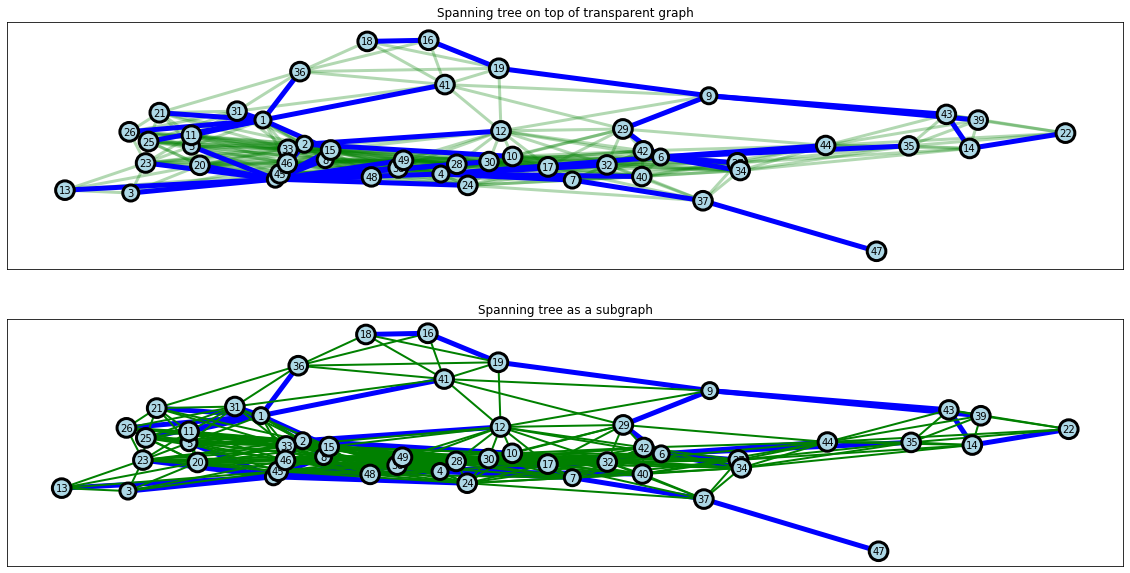

In [16]:
G = nx.generators.geometric.random_geometric_graph(50, 0.3)
H = nx.minimum_spanning_tree(G) #edge indexes are preserved
pos = nx.spring_layout(G)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1)

ax.set_title(f'Spanning tree on top of transparent graph')
nx.draw_networkx(G, pos, with_labels=False, node_size=100, edge_color='green', width=3, alpha=0.3)
nx.draw_networkx(H, pos, with_labels=True, font_size=10, node_size=200, edge_color='blue', width=5,
                bbox = dict(fc="lightblue", ec="black", boxstyle="circle", lw=3))
ax = fig.add_subplot(2, 1, 2)

ax.set_title(f'Spanning tree as a subgraph')
edgecolors = dict.fromkeys(G.edges, 'green') #dict of green edges
widths = dict.fromkeys(G.edges, 2)
for n in H.edges: 
    edgecolors[n], widths[n] = 'blue', 5
nx.draw_networkx(G, pos, with_labels=True, font_size=10, node_size=200, edge_color=edgecolors.values(), 
                width=list(widths.values()), bbox = dict(fc="lightblue", ec="black", boxstyle="circle", lw=3))
plt.show()

### igraph

A. Plot a circular graph that is matched by edges (0,1), (1,2), (2,3), (3,4), (4,5).  Use `ig.plot()` to plot it. Requirements should be satisfied:
* Edges has `color` and `weight` attributes assigned
* Plot attributes `color` and `weight` are extracted from attribute storage area of the graph
* Plot uses labels for vertices, lightgreen color and frame width = 3
* Plot uses circular layout
* **Plot is minimized using `bbox`**
* **Vertices are added one by one while creating a graph**

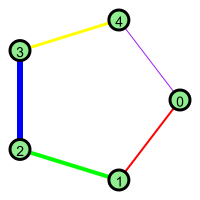

In [17]:
g = ig.Graph()

g.add_vertices([0, 1, 2, 3, 4]) #vertices should be declared before edges
g.add_edge(0,1,color='red',weight=2) # reindexes internal data structures
g.add_edge(1,2,color='green',weight=4)
g.add_edge(2,3,color='blue',weight=6)
g.add_edge(3,4,color='yellow',weight=3)
g.add_edge(4,0,color='purple',weight=1)

ig.plot(g,  
        bbox = (200, 200), # bounding box of plot
        vertex_color='lightgreen',
        edge_color=g.es['color'],
        edge_width=g.es['weight'],
        layout=g.layout('circle'), #default is 'auto'?
        vertex_label=g.vs['name'],
        vertex_frame_width=3,
        #vertex_label_size=ig.rescale(g.degree(),out_range=(1,12)),
        #vertex_size=ig.rescale(g.degree(),out_range=(5,25)), 
        #margin = 10,
        )

B. Same task, edges should be added every at once and then 'blue' color replaced by 'orange'

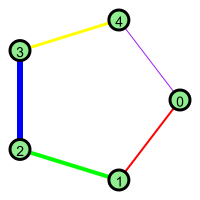

In [20]:
g = ig.Graph()
v = [0, 1, 2, 3, 4]
g.add_vertices(v)
g.add_edges(np.array([v, np.roll(v, -1)]).T)
g.es['color']=['red', 'green', 'blue','yellow','purple']
g.es['weight']=[2,4,6,3,1]
ig.plot(g,  
        bbox = (200, 200), # bounding box of plot
        vertex_color='lightgreen',
        edge_color=g.es['color'],
        edge_width=g.es['weight'],
        layout=g.layout('circle'), #default is 'auto'?
        vertex_label=g.vs['name'], #could be range(g.vcount())
        vertex_frame_width=3,
        #vertex_label_size=ig.rescale(g.degree(),out_range=(1,12)),
        #vertex_size=ig.rescale(g.degree(),out_range=(5,25)), 
        #margin = 10,
        )

C. **Converting vertex/edge names to indices**. All the edges must be vertices included before. Suppose you add vertices `[1,2,3,4,5]` and after that edges `[(1,2), (2,3), (3, 4), (4, 1)]`. Then all the edges are plotted in a wrong way because it were reindexed to `[0, 1, 2, 3, 4]` but names have been left old. Show how to access specific indexes of vertex and edge when they are either single or lists.

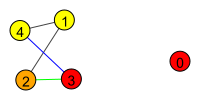

In [21]:
g = ig.Graph()
#g.add_vertices(np.unique(edges, return_index=True)[0])
g.add_vertices([1,2,3,5,4])
g.add_edges(np.array([(1,2), (2,3), (3, 4), (4, 1)])) #on top of reindexed values

#CREATE A COLOR LIST with one item changed
g.vs['color'] = np.repeat('red', g.vcount())

v_idx = g.vs['name'].index(3) #index corresponding to vertex name, g.vs['name'] is a list
v_idx_multiple = np.where(np.isin(g.vs['name'], [2,3,4]))[0].tolist() #my way of finding values [2,3,4] in g.vs['name']
g.vs[v_idx_multiple]['color'] = 'yellow' #checkout https://stackoverflow.com/questions/21287601 about change of individual attributes issue
g.vs[v_idx]['color'] = 'orange'

e_idx = g.get_eid(2,3) # edges, unlikely, don't preserve old values because no reindexing process is done
e_idx = g.es.find(_between=((2,),(3,))).index #alternative way, might be faster
e_idx_multiple = [e.index for e in g.es.select(_between=((2,4),(3,3)))] #this is a way that allows multiple edges: https://stackoverflow.com/questions/14594009/
g.es[e_idx_multiple]['color'] = 'blue'
g.es[e_idx]['color'] = 'green'

#CREATE A LABELS artificially
new_labels = np.arange(g.vcount())
ig.plot(g, bbox = (200, 100), vertex_label=new_labels, vertex_color=g.vs['color'], edge_color = g.es['color']) 

D. Define a function `create_from_edges` that takes any list of edges, fixes it and returns graph with previous vertex labels stored as 'name'. Proove that old names are accessible by plotting a graph with old names.

new_names: [0, 1, 2, 3, 4]
old_names: [1, 2, 3, 4, 5]


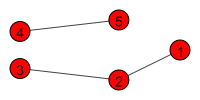

In [22]:
def create_from_edges(edgelist):
    g = ig.Graph()
    u, inv = np.unique(edgelist, return_inverse=True)
    e = inv.reshape(edgelist.shape)
    g.add_vertices(u) #add vertices, not reindexed
    g.add_edges(e) #add edges, reindexed
    return g

g = create_from_edges(np.array([(1, 2), (5, 4), (3, 2)]))
print('new_names:', g.vs.indices)
print('old_names:', g.vs['name'])
ig.plot(g,  bbox = (200, 100), layout=g.layout('circle'), vertex_label=g.vs['name'])

E. `create_from_edges` is incomplete. The mostly because it is unable to append existing graph using reindexation. Implement an extra function for `ig.Graph()`: `add_edges_from(g, edgelist)` that adds remaining vertices itself and fixes edges according to the existent vertices before adding them in `g`.

old_names: [1, 3, 7]
input edges:
 [[1 2]
 [5 4]
 [3 2]]
replacement (of two kinds):
 [['O' '*']
 ['*' '*']
 ['O' '*']]
output edges:
 [[0 3]
 [5 4]
 [1 3]]


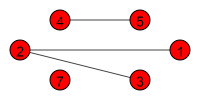

In [23]:
'''replacer() method is also a part of numpy basics'''

def replacer(X, Y):
    # this method is not vectorised yet (X = 1D array, Y = substitution array)
    return [Y[Y[:,0]==i, 1][0] if i in Y[:,0] else i for i in X]
     
def add_edges_from(g, edgelist, print_info=True):
    #u, inv = np.unique([g.vs['name'], edgelist], return_inverse=True)
    #TAGGING PROCESS:
    # |12|    |*2|
    # |54| -> |54| -> replace with inverse of [2,5,4,2]; replace stars with replacer of [1,3,7]
    # |32|    |*2|
    e = np.array(edgelist)
    try:
        namespace = g.vs['name']
    except KeyError:
        namespace = []
    if print_info:
        print('old_names:', namespace)
        print('input edges:\n', e)
    tagged = np.isin(e, namespace)
    untagged_mask = np.where(~tagged)
    tagged_mask = np.where(tagged)
    u, inv_untagged = np.unique(e[untagged_mask], return_inverse=True) #return tags of unnamed nodes of edgelist
    _, inv_tagged = np.unique(namespace, return_inverse=True) #return tags named nodes of edgelist
    e[untagged_mask] = inv_untagged + g.vcount() # tag normally then increase start position by amount of tagged nodes
    e[tagged_mask] = replacer(e[tagged_mask], np.array([namespace, np.arange(g.vcount())]).T) # need to extract indices from irregular list of names ???
    if print_info:
        stars = np.full(e.shape, '*')
        stars[tagged_mask] = 'O'
        print('replacement (of two kinds):\n', stars)
        print('output edges:\n', e)
    g.add_vertices(u)
    g.add_edges(e) #add edges, reindexed

g = ig.Graph()
g.add_vertices([1,3,7])
add_edges_from(g, np.array([(1, 2), (5, 4), (3, 2)]))


ig.plot(g,  bbox = (200, 100), layout=g.layout('circle'), vertex_label=g.vs['name'])

F. Given edges, use `add_edges_from` to create a new graph and plot it using different colors for its components.

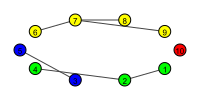

In [24]:
g = ig.Graph()
g.add_vertices([10])
add_edges_from(g, [(1, 2), (2, 4), (3, 5), (9,7), (7,8), (7,6)], print_info=False)
i = g.clusters()
pal = ig.drawing.colors.ClusterColoringPalette(len(i)) #input denotes number of colors used
color = pal.get_many(i.membership) ##i.membership is tagged list; this is remap into color codes
ig.plot(g,  bbox = (200, 100), layout=g.layout('circle'), vertex_label=g.vs['name'], 
        vertex_color = color, vertex_size = 12, vertex_label_size = 8) 

G. Create your custom huge graph automatically and color its communities in different colors and draw colored regions around.

Clustering with 30 elements and 6 clusters
[0] 0, 5, 6, 14, 18, 19, 29
[1] 1, 3, 21, 24
[2] 12, 25, 28
[3] 13, 16, 17, 26, 27
[4] 2, 8, 9, 10, 22
[5] 4, 7, 11, 15, 20, 23


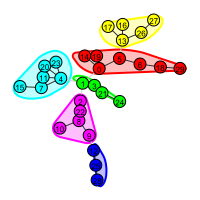

In [25]:
g = ig.Graph.Barabasi(n = 30, m = 1)
i = g.community_leading_eigenvector()
print(i)
pal = ig.drawing.colors.RainbowPalette(len(i)) #usual is ClusterColoringPalette
g.vs['color'] = pal.get_many(i.membership) #another_way to feed color into ig.plot
ig.plot(i, bbox = (200, 200), vertex_label=range(g.vcount()), mark_groups=True,
       vertex_size = 12, vertex_label_size = 8) #ig.plot over cluster i, not graph g!

H. Plot a diagram with several plots of multiple graphs and axis turned on. Unfortunately, [didn't suceed](http://www.stackoverflow.com/questions/63536495/) with cairo backend using modified definition of [GraphArtist](https://lists.nongnu.org/archive/html/igraph-help/2010-06/txtncWL6o4O3e.txt). [This is my support question](https://igraph.discourse.group/t/how-to-draw-multiple-subplots-on-cairo-surface/423) about how to add artists on top of cairo surface written on top of another [source](https://stackoverflow.com/questions/18250684/add-title-and-legend-to-igraph-plots).

I. Illustrate adjacency matrix of graph.

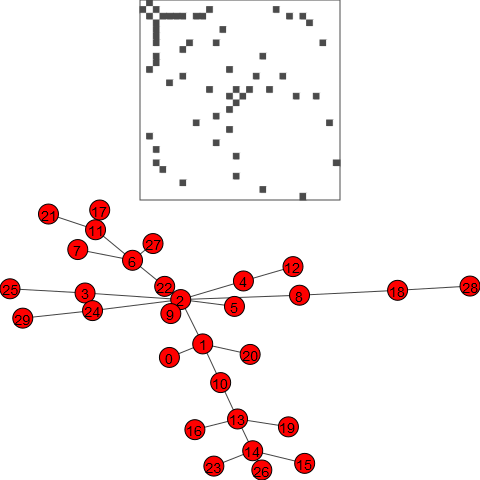

In [26]:
adj_width = 200
plot_width = 480
margin = 10
g = ig.Graph.Barabasi(n = 30, m = 1)
adj = g.get_adjacency() #igraph.datatypes.Matrix
fig = ig.Plot(bbox=(plot_width, plot_width))
fig.add(g, bbox=(margin, adj_width + margin, plot_width - margin, plot_width - margin), layout="fr", vertex_label=range(g.vcount()))
fig.add(adj, bbox=(plot_width/2 - adj_width/2, 0, plot_width/2 + adj_width/2, adj_width), grid_width=20, opacity=0.7) #plot ajacency matrix
#fig.show() or fig.save('adj.png')
my_display(fig)

J. Create a graph from adjacency matrix.

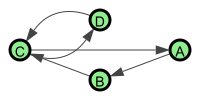

In [27]:
g = ig.Graph.Adjacency(np.array([[False, True,  False, False],
                [False, False, True,  False],
                [True,  False, False, True ],
                [False, False, True,  False]]).tolist())
g.vs['label'] = ['A','B','C','D']
ig.plot(g,  
        bbox = (200, 100), # bounding box of plot
        vertex_color='lightgreen',
        layout=g.layout('circle'), #default is 'auto'?
        vertex_label=g.vs['label'],
        vertex_frame_width=3)

K. Extract edges from graph with specified target value. Sources: [SO](https://stackoverflow.com/questions/14594009/) and [documentation of EdgeSeq](https://igraph.org/python/doc/igraph.EdgeSeq-class.html)

edge ids: [0, 1, 4]
g.es tuple values: [(0, 1), (1, 2), (1, 5)]
g.es source-target values: [(0, 1), (1, 2), (1, 5)]


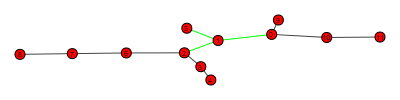

In [9]:
import igraph as ig
g = ig.Graph(n = 12)
g.add_edges([(1,0), (2,1), (3,2), (4,3), (5,1), (6,2), (7,6), (8,7), (9,0), (10,0), (11,10)])

#iterating over EdgeSeq objects:
edge_ids = [e.index for e in g.es.select(_source=(1,))] 
#alternative_ways:
#edge_ids = g.incident(1, mode="out")
#edge_ids = [e.index for e in g.es.select(_incident=(1,7))]
#edge_ids = [e.index for e in g.es.select(_source=1)]

#Note that g.es.find is the first item of g.es.select only

print('edge ids:', edge_ids)
print('g.es tuple values:', [(g.es[e].tuple) for e in edge_ids])
print('g.es source-target values:', [(g.es[e].source, g.es[e].target) for e in edge_ids])

g.es[edge_ids]['color'] = 'green'
fig = ig.plot(g, bbox=(400, 100), vertex_size=10, vertex_label_size=7, vertex_label = g.vs.indices)
#fig.show() or fig.save('fig.png')
my_display(fig)

L. Extract layout of previous graph in order to reuse it for plot of its spanning tree

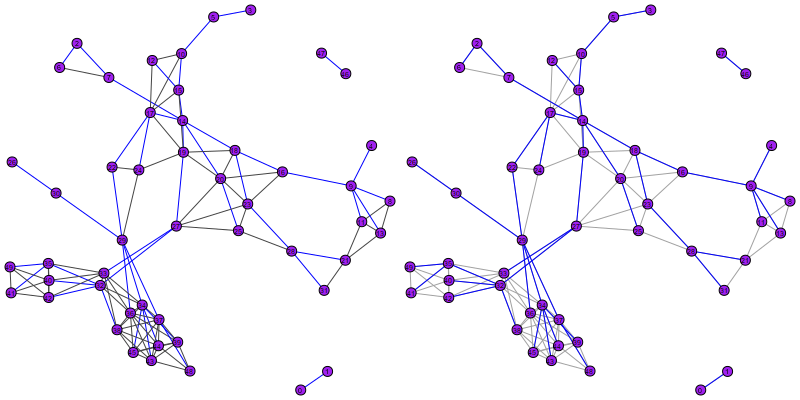

In [29]:
g = ig.Graph.GRG(50, 0.2)
B = (800, 400)
layout = g.layout('fr')

mst = g.spanning_tree() #indexes of edges have changed
fig = ig.Plot(bbox=(800, 400))

# OPACITY=0.5 ON THE RIGHT GRAPH
fig.add(g, bbox=(400, 0, 800, 400), layout=layout, opacity=0.5, vertex_size=0, edge_size=20, margin=10)
fig.add(mst, bbox=(400, 0, 800, 400), layout=layout, edge_color="blue", 
        vertex_label=g.vs.indices, vertex_size=10, vertex_label_size=7, vertex_color = 'purple', margin=10)

#NO OPACITY ON THE LEFT GRAPH, some clever manipulation to extract edges is needed
new_g = g.copy()
new_g.es[[g.get_eid(*e.tuple) for e in mst.es]]['color']='blue' #extract indexes of spanning edges with repect to old graph
fig.add(new_g, bbox=(400, 400), layout=layout,  
        vertex_label=g.vs.indices, vertex_size=10, vertex_label_size=7, vertex_color = 'purple', margin=10)
#fig.show() or fig.save('fig.png')
my_display(fig)

### Applications

* Given binary image, convert it to igraph and visualise with the same layout. Label nodes with degrees. Remark: a power `create_from_edges` can be applied. [Source](https://stackoverflow.com/a/63657018/3044825)

In [8]:
x, y = np.meshgrid(np.linspace(-np.pi/2, np.pi/2, 30), np.linspace(-np.pi/2, np.pi/2, 30))
image = (np.sin(x**2+y**2)[1:-1,1:-2] > 0.9).astype(int) #boolean image

def ig_imagetograph(image):
    def create_from_edges(edgearray):
        #This function immitates behaviour nx.add_edges_from for empty graph
        g = ig.Graph()
        u, inv = np.unique(edgearray, return_inverse=True)
        e = inv.reshape(edgearray.shape)
        g.add_vertices(u) #add vertices, in any order
        g.add_edges(e) #add edges, in reindexed order
        return g #old indices are kept in g.vs['name']

    #Create array of edges with image pixels enumerated from 1 to N
    image_idx = np.arange(image.size).reshape(*image.shape) #pixels of image indexed with numbers 1 to N

    hx, hy = np.where(image[1:] & image[:-1]) #horizontal edges as 2D indices
    h_starts_idx = image_idx[hx, hy] #image_idx where horizontal edge starts
    h_ends_idx = image_idx[hx+1, hy] #image_idx where horizontal edge starts

    vx, vy = np.where(image[:, 1:] & image[:, :-1]) #vertical edges as 2D indices
    v_starts_idx = image_idx[vx, vy] #image_idx where verical edge starts
    v_ends_idx = image_idx[vx, vy+1] #image_idx where vertical edge starts

    edgearray = np.vstack([np.array([h_starts_idx, h_ends_idx]).T, 
                          np.array([v_starts_idx, v_ends_idx]).T])
    g = create_from_edges(edgearray)
    return g

def nx_imagetograph(image):
    #CONSTRUCTION OF HORIZONTAL EDGES
    hx, hy = np.where(image[1:] & image[:-1]) #horizontal edge start positions
    h_units = np.array([hx, hy]).T
    h_starts = [tuple(n) for n in h_units]
    h_ends = [tuple(n) for n in h_units + (1, 0)] #end positions = start positions shifted by vector (1,0)
    horizontal_edges = zip(h_starts, h_ends)

    #CONSTRUCTION OF VERTICAL EDGES
    vx, vy = np.where(image[:,1:] & image[:,:-1]) #vertical edge start positions
    v_units = np.array([vx, vy]).T
    v_starts = [tuple(n) for n in v_units]
    v_ends = [tuple(n) for n in v_units + (0, 1)] #end positions = start positions shifted by vector (0,1)
    vertical_edges = zip(v_starts, v_ends)
    
    G = nx.Graph()
    G.add_edges_from(horizontal_edges)
    G.add_edges_from(vertical_edges)
    return G

def ig_imagedisplay(g, image, save=True):
    X, Y = (units.reshape(image.size) for units in np.indices(image.shape)) #X and Y coordinates of image_idx
    idx = np.array([X, Y]).T #layout of nodes
    layout = ig.Layout(idx[g.vs['name']].tolist())
    fig = ig.plot(g, bbox=np.array(image.shape) * 15, 
        layout = layout, #only lists can be passed in to layout
        vertex_color = 'lightblue', #another_way to feed color into ig.plot
        vertex_label = g.vs['name'], vertex_size=14, vertex_label_size=8)
    if save:
        fig.save(f'ig_graph{image.shape}.png')
    else:
        fig.show()
    # pal = ig.drawing.colors.RainbowPalette(3) #usual is ClusterColoringPalette
    # _, colortags = np.unique(g.vs.degree(), return_inverse=True)
    # ig.plot(g, bbox=(450, 450), 
    #         layout = layout
    #         vertex_color = pal.get_many(colortags.tolist()), vertex_label = g.vs['name'], vertex_size=14, vertex_label_size=8)

def nx_imagedisplay(G, image, save=True):
    pos = dict(zip(G.nodes(), G.nodes())) # map node names to coordinates
    nx.draw_networkx(G, pos, with_labels=False, node_size=0)
    labels={node: f'({node[0]},{node[1]})' for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=6, font_family='serif', font_weight='bold', 
                            bbox = dict(fc='lightblue', ec="black", boxstyle="round", lw=1))
    if save:
        plt.gcf().set_size_inches(np.array([13.5, 9]) * image.shape[0] // 30)
        plt.savefig(f'nx_graph{image.shape}.png')
        plt.close()
    else:
        plt.show()

G = nx_imagetograph(image)
nx_imagedisplay(G, image)
g = ig_imagetograph(image)
ig_imagedisplay(g, image)

<img src="iggraph.PNG"> 

<img src="nxgraph.PNG"> 

* Create an animation using `graphviz_layout` + `matplotlib.animation.FuncAnimation`. [Source](https://stackoverflow.com/questions/63534961/)

In [160]:
import matplotlib.animation as animation
plt.rcParams['figure.dpi'] = 50  
from IPython.display import HTML
#conda install pydot - it installs pydot + graph_viz
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# make the function to pass to FuncAnimation method
def step(G, pos, N):
    plt.cla()
    plt.title('explosion radius = {}'.format(N))  # each graph is a new frame
    if N==0:
        nx.set_node_attributes(G, dict.fromkeys(G.nodes, 'lightblue'), 'color')
        G.nodes[0]['color'] = 'blue'
    else:
        subtree = nx.generators.ego_graph(G, 0, radius=N)
        nx.set_node_attributes(G, dict.fromkeys(subtree.nodes, 'blue'), 'color')
    nx.draw_networkx(G, pos, node_color=nx.get_node_attributes(G, 'color').values(), node_size=300)
    if N==FRAMES_NUM: 
        plt.close() #ensure that only one plot is displayed

G = nx.balanced_tree(2, 5) #assumption that branch node is 0 needed
FRAMES_NUM = 5
pos = graphviz_layout(T, prog="twopi")
ani = animation.FuncAnimation(plt.gcf(), lambda N, G=G, pos=pos: step(G, pos, N), frames=FRAMES_NUM+1, interval=500)
#ani.save('animation.gif', writer='imagemagick')
HTML(ani.to_jshtml()) #or HTML(ani.to_html5_video())

* Measure performace of converting image to graph using perfplot. This is a [simple example](https://stackoverflow.com/a/63661277/3044825) of `perfplot` usage.

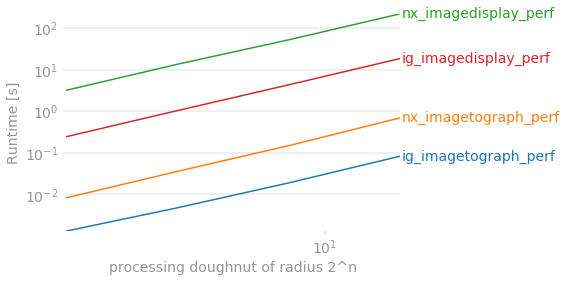

In [6]:
import perfplot

def nx_imagetograph_perf(data):
    nx_imagetograph(data[0])

def ig_imagetograph_perf(data):
    ig_imagetograph(data[0])
    
def nx_imagedisplay_perf(data):
    nx_imagedisplay(data[1], data[0])
    
def ig_imagedisplay_perf(data):
    ig_imagedisplay(data[2], data[0])
    
def doughnut(radius):
    x, y = np.meshgrid(np.linspace(-np.pi/2, np.pi/2, radius), np.linspace(-np.pi/2, np.pi/2, radius))
    image = (np.sin(x**2+y**2) > 0.9).astype(int)
    return image

r = perfplot.show(
    setup=lambda n: (np.tile(doughnut(30), (n,n)), 
                     nx_imagetograph(np.tile(doughnut(30), (n,n))), 
                     ig_imagetograph(np.tile(doughnut(30), (n,n)))),
    kernels=[ig_imagetograph_perf, nx_imagetograph_perf, nx_imagedisplay_perf, ig_imagedisplay_perf],
    n_range=[2 ** k for k in range(1, 5)],
    xlabel="processing n * n copies of doughtnut",
    equality_check=None,
    show_progress=False)

### More
* [Social Network Analysis with Python](https://www.kirenz.com/post/2019-08-13-network_analysis/)
* [Network Analysis with Python Datacamp](https://trenton3983.github.io/files/projects/2020-05-21_intro_to_network_analysis_in_python/2020-05-21_intro_to_network_analysis_in_python.html)
* `igraph` manuals:
  - [python igraph manual](https://igraph.org/python/doc/tutorial/tutorial.html)
  - [python igraph documentation by Tamas](http://www.cs.rhul.ac.uk/home/tamas/development/igraph/tutorial/tutorial.html)
  - [igraph library screenshots](http://cneurocvs.rmki.kfki.hu/igraph/screenshots2.html)

### Future asks

* Convert 3D sparse matrix to graph
* How to save and retrieve graphs?

### Additional demo example of igraph relabel system

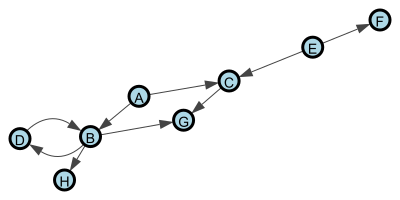

In [22]:
import igraph as ig
g = ig.Graph(directed=True)
nodes = list('ABCDEFGH')
edges = [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'D'), ('C', 'G')]

idx = dict(zip(nodes, range(len(nodes))))
g_nodes = [idx[A] for A in nodes]
g_edges = [(idx[A], idx[B]) for A, B in edges]

g.add_vertices(g_nodes)
g.add_edges(g_edges)


ig.plot(g,  
        bbox = (400, 200), # bounding box of plot
        vertex_color='lightblue',
        vertex_label=nodes,
        vertex_frame_width=3)